In [17]:
import pandas as pd 
import numpy as np 
import utils.data_prepare as dp 
from utils.my_dict import metro_dict, gminy_dict
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="example app")
def get_geopy_data(address):
    if geolocator.geocode(address):
        lat, lon, p = geolocator.geocode(address).point
        return [lat, lon]
    else: 
        return "can't find"

moskwa = [55.751244, 37.618423] 

In [18]:
train = pd.read_hdf('data/property.train.h5')

### METRO DICT

In [19]:
metro_stations = pd.DataFrame.from_dict(metro_dict, orient='index',columns=['lat', 'lon'])

In [20]:
metro_stations

,lat,lon
МЦК Крымская,-0.612480,-0.153997
МЦК Кутузовская,-0.115210,-0.861847
МЦК Шелепиха,0.078110,-0.979954
МЦК Лужники,-0.303060,-0.605557
МЦК Коптево,0.827175,-1.088532
МЦК Хорошёво,0.258190,-1.131877
МЦК ЗИЛ,-0.532460,0.271433
МЦК Шоссе Энтузиастов,0.076590,1.253994
МЦК Нижегородская,-0.190910,1.075062
МЦК Угрешская,-0.340384,0.757030


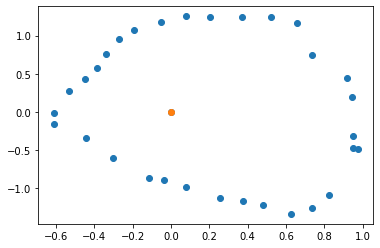

In [21]:
plt.scatter(x=metro_stations['lat'], y=metro_stations['lon'])
plt.scatter(x=0, y=0)
plt.show()

### GMINY DICT

In [22]:
import json
with open("data/mo.geojson") as f:
    data = json.load(f)

In [23]:
gminy = []
okregi = [] 
latitude = []
longitude = []
for elem in data['features']: 
    gminy.append(elem["properties"]['NAME'])
    okregi.append(elem["properties"]['NAME_AO'])
    if elem["geometry"]["type"] == "MultiPolygon": 
        coor = elem["geometry"]["coordinates"][0][0]
    if elem["geometry"]["type"] == "Polygon": 
        coor = elem["geometry"]["coordinates"][0]
    lat = (np.mean ([e[0] for e in coor]) - moskwa[1]) * 10
    lon = (np.mean ([e[1] for e in coor]) - moskwa[0]) * 10 
    latitude.append(lat)
    longitude.append(lon)

gminy_dict = {}
for g,lat,lon in zip(gminy,latitude,longitude):
    gminy_dict[g] = [lat,lon]

### DEF breadcrumbs

In [24]:
df = dp.breadcrumbs(train)

/Users/ewa.suknarowska/Desktop/pml8_competition/utils/data_prepare.py:191: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["lat"], df["lon"] = df.lat_lon.str


In [25]:
df

,breadcrumbs,date,geo_block,owner,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,...,Type of the building:,Playground:,Class:,nowa_moskwa,metro,m,gminy,lat,lon,drogie_ohe
0,[МЦК Лужники],"[23 февраля 2018, 133, (+2 за сегодня), Обновл...","[г. Москва, г. Москва]",[],380.610000,"secure Parking, video surveillance, 24-hour se...",Brick,apartments,new building,no fee,...,NaN,NaN,NaN,None,МЦК Лужники,None,None,-0.303060,-0.605557,0
1,"[Новая Москва, п. Сосенское, п. Коммунарка, Юж...","[сегодня в 04:52, 3, (+3 за сегодня)]","[Новая Москва, п. Сосенское, п. Коммунарка, Юж...",[],8.004631,Yes,Monolithic-brick,flat,from the developer,no fee,...,NaN,NaN,NaN,Новая Москва,МЦК Крымская,м. Бунинская Аллея,Южное Бутово,-1.064900,-2.248218,0
2,"[МЦК Крымская, ул. Поляны]","[5 марта, 6, (+1 за сегодня), Обновлено 15 мая]","[г. Москва, ул Поляны, г. Москва, ул Поляны]",[],6.520000,provided,Monolithic,apartments,from the developer,no fee,...,NaN,NaN,NaN,None,МЦК Крымская,None,None,-0.612480,-0.153997,0
3,"[Беговой, м. Динамо, МЦК Хорошёво]","[22 мая 2018, 60, (+2 за сегодня), Обновлено 1...","[г. Москва, Беговой, г. Москва, Беговой]",[],20.269686,NaN,Monolithic,flat,new building,no fee,...,NaN,NaN,NaN,None,МЦК Хорошёво,м. Динамо,Беговой,-0.506602,0.299148,1
4,"[Филёвский Парк, м. Фили, МЦК Шелепиха]","[26 декабря 2018, 13, (+1 за сегодня), Обновле...","[г. Москва, Филёвский Парк, г. Москва, Филёвск...",[],15.100880,NaN,Monolithic,apartments,secondary,no fee,...,NaN,NaN,NaN,None,МЦК Шелепиха,м. Фили,Филёвский Парк,-1.450963,-0.025490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45689,"[Солнцево, м. Говорово, МЦК Лужники]","[12 апреля, 10, (+1 за сегодня), Обновлено 14 ...","[г. Москва, Солнцево, г. Москва, Солнцево]",[],7.896240,NaN,Panel,flat,new building,no fee,...,NaN,NaN,NaN,None,МЦК Лужники,м. Говорово,Солнцево,-2.204536,-1.086002,0
45690,[МЦК Кутузовская],"[13 апреля, 10, (+1 за сегодня), Обновлено 17 ...","[г. Москва, г. Москва]",[],16.920000,provided,Monolithic,apartments,from the developer,no fee,...,NaN,NaN,NaN,None,МЦК Кутузовская,None,None,-0.115210,-0.861847,0
45691,"[Новогиреево, м. Новокосино, МЦК Нижегородская]","[4 ноября 2018, 86, (+1 за сегодня), Обновлено...","[г. Москва, Новогиреево, г. Москва, Новогиреево]",[],2.800000,NaN,Panel,Studio,secondary,no fee,...,NaN,NaN,NaN,None,МЦК Нижегородская,м. Новокосино,Новогиреево,1.861109,-0.027998,0
45692,[МЦК Бульвар Рокоссовского],"[3 апреля, 9, (+1 за сегодня), Обновлено 16 мая]","[г. Москва, г. Москва]",[],5.740000,NaN,Monolithic,apartments,from the developer,no fee,...,NaN,NaN,NaN,None,МЦК Бульвар Рокоссовского,None,None,0.659780,1.163314,0


In [26]:
m_dict = {}
for adres in set(df.m):
    m_dict[adres] = get_geopy_data(str(adres))

In [21]:
m_dict

{'м. Улица Горчакова': [55.5416984, 37.5307058],
 'м. Кутузовская': [55.7399001, 37.5339703],
 'м. Минская': [53.5104111, 28.1428263],
 'м. Алма-Атинская': [55.632749, 37.7660616],
 'м. Алексеевская': [50.2909025, 42.1849358],
 'м. Алтуфьево': [55.9002037, 37.5878786],
 'м. Ленинский проспект': [55.7076167, 37.5862116],
 'м. Беломорская': [55.865014, 37.4748195],
 'м. Киевская': [47.6220351, 142.1291945],
 'м. Тверская': [55.7648953, 37.606313],
 'м. Юго-Западная': [55.6636469, 37.4832189],
 'м. Водный стадион': [55.8400784, 37.4866958],
 'м. Сходненская': [55.8504805, 37.4397738],
 'м. Славянский бульвар': [55.7295963, 37.4707878],
 'м. Рижская': [55.792504449999996, 37.63616861085677],
 'м. Отрадное': [44.566066, 33.49785304156806],
 'м. Площадь Ильича': [55.7471909, 37.6833543],
 'м. Пролетарская': [52.284607199999996, 30.88651775],
 'м. Битцевский парк': [55.6001546, 37.5565381],
 'м. Ховрино': [55.8781328, 37.4807583],
 'м. Свиблово': [55.8551194, 37.6527359],
 'м. Филевский парк'